<a href="https://colab.research.google.com/github/MartyWeissman/PythonForMathematics/blob/main/Math152_Mar9_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teaching notebook, March 9, 2021

Starting to understand randomness, and "null-hypotheses" in mathematics.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
A = np.random.random(100000)
#A = np.random.normal(size=100000)
print(A[:10]) # I like to print the first 10 elements.

[0.65658349 0.0263772  0.2841657  0.50240162 0.38364971 0.55249326
 0.52356912 0.91627988 0.41444708 0.97206821]


(array([ 9933., 10013.,  9935., 10021.,  9936., 10162., 10092., 10100.,
         9849.,  9959.]),
 array([1.04906219e-05, 1.00008525e-01, 2.00006559e-01, 3.00004593e-01,
        4.00002627e-01, 5.00000661e-01, 5.99998695e-01, 6.99996729e-01,
        7.99994764e-01, 8.99992798e-01, 9.99990832e-01]),
 <a list of 10 Patch objects>)

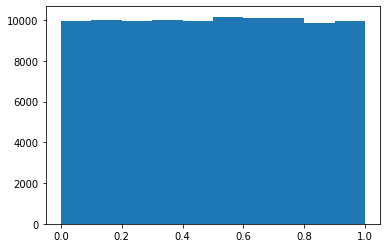

In [50]:
plt.hist(A)

In [51]:
import seaborn as sns

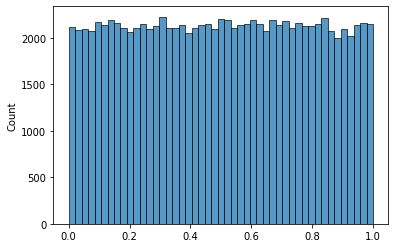

In [52]:
sns.histplot(A)

In [53]:
my_bins = np.linspace(0,1.0,101)
my_bins[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

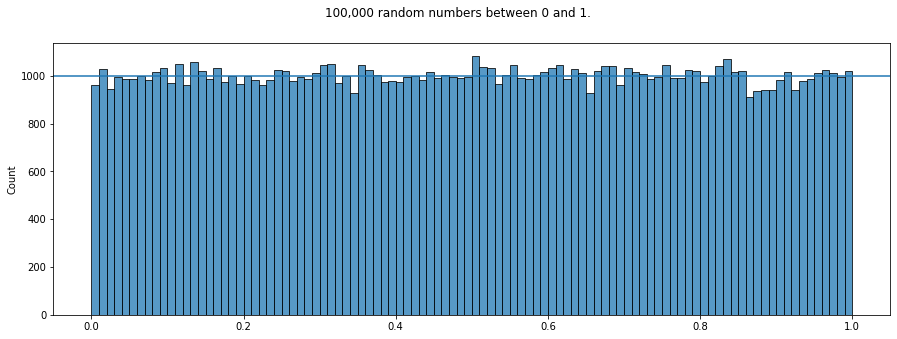

In [56]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
sns.histplot(A, bins=my_bins)
ax.axhline(1000)
plt.suptitle('100,000 random numbers between 0 and 1.')
plt.show()

In [38]:
np.histogram(A, bins=my_bins) # Get histogram data instead of plot.

(array([ 985,  976,  994,  984,  943, 1077,  937, 1012, 1044,  999, 1027,
        1014,  963,  940,  972, 1032, 1030, 1021, 1021, 1007, 1027,  968,
        1026, 1028,  980,  940, 1043,  936,  975, 1078,  993, 1024, 1025,
        1049,  984,  977,  977, 1043, 1023, 1006,  971,  958,  964, 1022,
        1023, 1028,  996,  986,  943,  995,  978, 1008, 1010,  993, 1032,
         962,  972,  964, 1022, 1007, 1008, 1007,  977, 1002, 1051,  988,
        1004,  999, 1011, 1000,  965,  977,  971, 1011, 1008,  974,  979,
        1006,  977, 1028, 1004,  980, 1022, 1012, 1029, 1025, 1019, 1010,
         944,  981, 1045,  992, 1057,  989, 1061, 1044,  990,  971,  958,
        1010]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

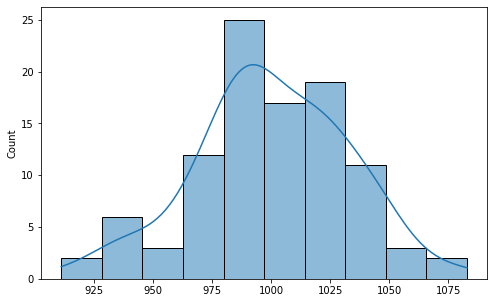

In [57]:
A_binned = np.histogram(A, bins=my_bins)[0]
fig,ax = plt.subplots(1,1,figsize=(8,5))
sns.histplot(A_binned, kde=True)
# ax.set_xlim(900,1100)
plt.show()

In [58]:
N_array = np.arange(100000)
sqrt_array = np.sqrt(N_array)
# Look at digits after decimal point.

In [59]:
sqrt_array[:10]

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [60]:
sqrt_dec = sqrt_array - np.floor(sqrt_array)
sqrt_dec[:10]

array([0.        , 0.        , 0.41421356, 0.73205081, 0.        ,
       0.23606798, 0.44948974, 0.64575131, 0.82842712, 0.        ])

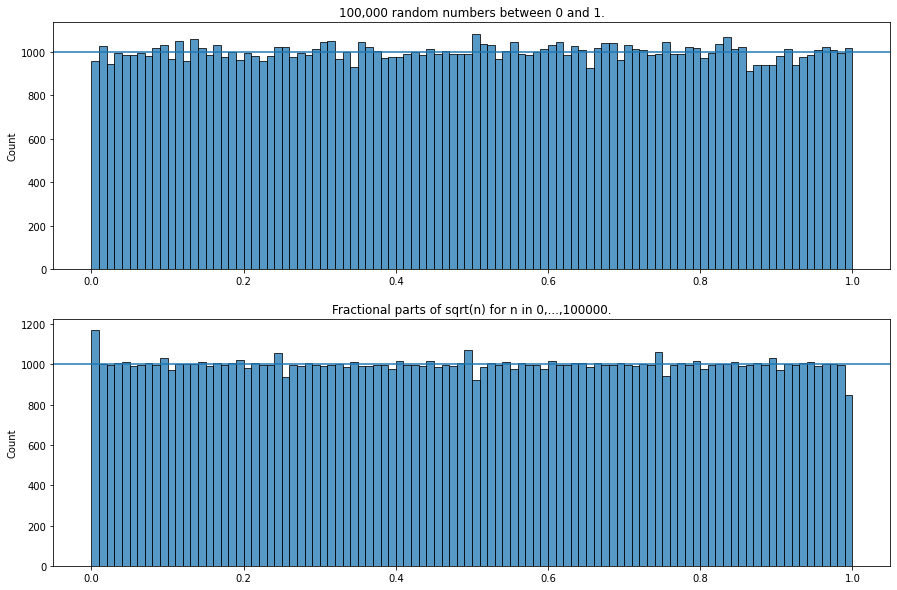

In [63]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
sns.histplot(A, bins=my_bins, ax=ax[0])
ax[0].axhline(1000)
ax[0].set_title('100,000 random numbers between 0 and 1.')

sns.histplot(sqrt_dec, bins=my_bins, ax=ax[1])
ax[1].axhline(1000)
ax[1].set_title('Fractional parts of sqrt(n) for n in 0,...,100000.')
plt.show()

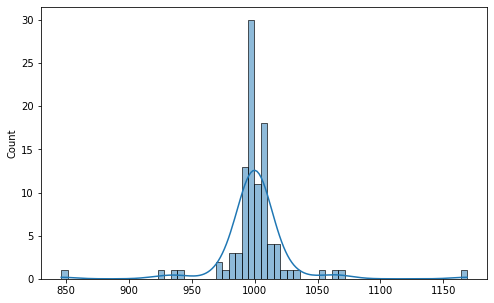

In [74]:
S_binned = np.histogram(sqrt_dec, bins=my_bins)[0]
fig,ax = plt.subplots(1,1,figsize=(8,5))
sns.histplot(S_binned, kde=True)
# ax.set_xlim(900,1100)
plt.show()

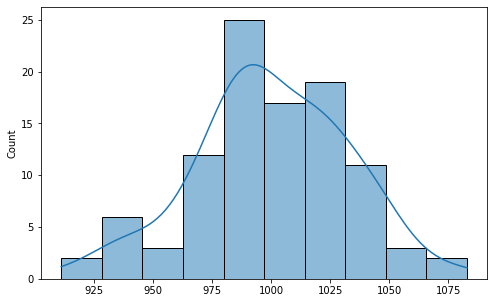

In [75]:
A_binned = np.histogram(A, bins=my_bins)[0]
fig,ax = plt.subplots(1,1,figsize=(8,5))
sns.histplot(A_binned, kde=True)
# ax.set_xlim(900,1100)
plt.show()

In [64]:
from math import gcd # Uses Euclidean algorithm.
gcd(49,91)

7

In [65]:
gcd(0,17)

17

In [66]:
def make_Fbins(max_denominator):
    '''
    Makes an array of rational numbers
    between 0/1 and 1/1, with maximum 
    denominator max_denominator
    '''
    R_list = []
    for denominator in range(1,max_denominator+1):
        for numerator in range(0,denominator+1):
            if gcd(numerator, denominator) == 1:  # Only use reduced fractions.
                R_list.append(numerator / denominator)  
    R_list.sort() # Sort the list!  Works "in place"
    return np.array(R_list) # We like numpy arrays here.

In [67]:
make_Fbins(5)

array([0.        , 0.2       , 0.25      , 0.33333333, 0.4       ,
       0.5       , 0.6       , 0.66666667, 0.75      , 0.8       ,
       1.        ])

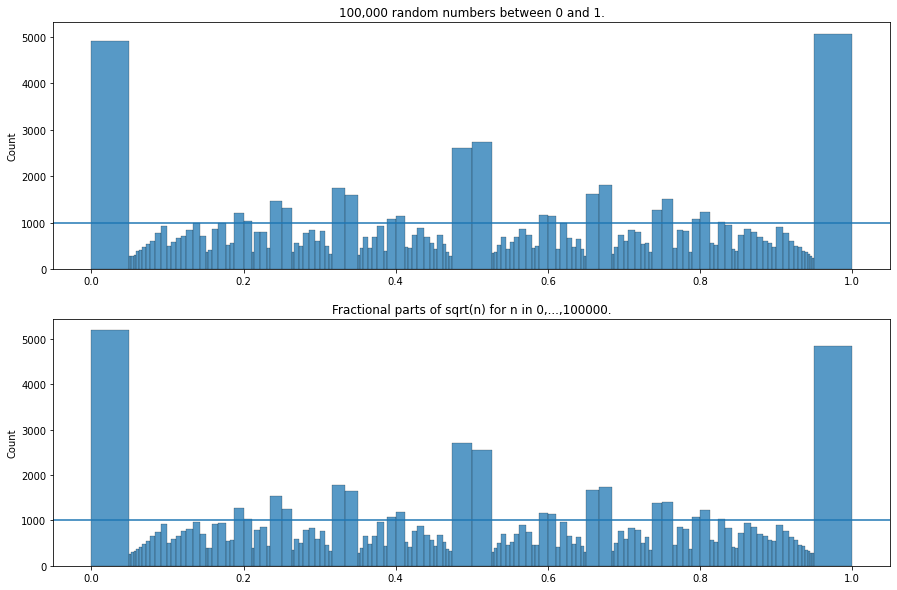

In [68]:
my_bins = make_Fbins(20)

fig,ax = plt.subplots(2,1,figsize=(15,10))
sns.histplot(A, bins=my_bins, ax=ax[0])
ax[0].axhline(1000)
ax[0].set_title('100,000 random numbers between 0 and 1.')

sns.histplot(sqrt_dec, bins=my_bins, ax=ax[1])
ax[1].axhline(1000)
ax[1].set_title('Fractional parts of sqrt(n) for n in 0,...,100000.')
plt.show()

See [MathOverflow](https://mathoverflow.net/questions/292044/distribution-of-square-roots-mod-1) for more.

In [70]:
N_array = np.arange(1,100000)
log_array = np.log(N_array)

In [71]:
log_array[:10]

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509])

In [72]:
log_dec = log_array - np.floor(log_array)
log_dec[:10]

array([0.        , 0.69314718, 0.09861229, 0.38629436, 0.60943791,
       0.79175947, 0.94591015, 0.07944154, 0.19722458, 0.30258509])

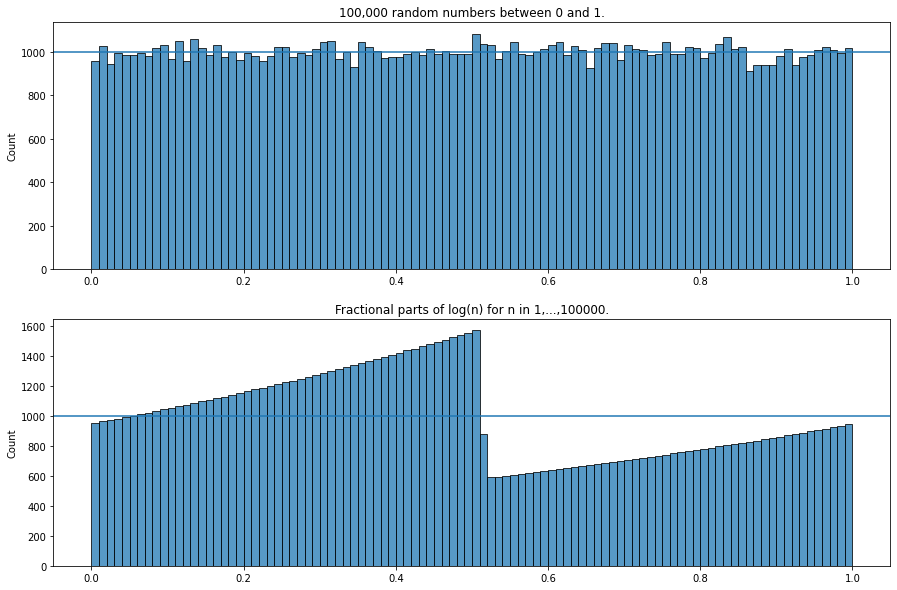

In [73]:
my_bins = np.linspace(0,1.0,101)

fig,ax = plt.subplots(2,1,figsize=(15,10))
sns.histplot(A, bins=my_bins, ax=ax[0])
ax[0].axhline(1000)
ax[0].set_title('100,000 random numbers between 0 and 1.')

sns.histplot(log_dec, bins=my_bins, ax=ax[1])
ax[1].axhline(1000)
ax[1].set_title('Fractional parts of log(n) for n in 1,...,100000.')
plt.show()